In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# EDA를 연습해봅시다!

In [12]:
train = pd.read_csv('Kaggle/bike-sharing-demand/train.csv', parse_dates=['datetime'])
test = pd.read_csv('Kaggle/bike-sharing-demand/test.csv', parse_dates=['datetime'])

ms, us, ns(10의 -9초 ) ps 

In [13]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   

In [16]:
train.temp.describe() # count는 데이터 갯수 temp:온도
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [19]:
train.datetime
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

임의의 날짜 입력 -> 자전거 대여 수? 예측모델   
연도 정보가 대여건수에 영향을 줌.  
한 컬럼을 여러 정보로 나누기   
일은 영향을 많이 주지 않음, 요일이 영향을 많이 줄뿐!  

시가 대여건수에 영향을 줄 것임  

# 년도 별로 시각화


In [20]:
train['year'] = train.datetime.dt.year
train['month'] = train.datetime.dt.month
train['day'] = train.datetime.dt.day
train['hour'] = train.datetime.dt.hour
train['minute'] = train.datetime.dt.minute
train['second'] = train.datetime.dt.second

In [32]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'yearly rent')]

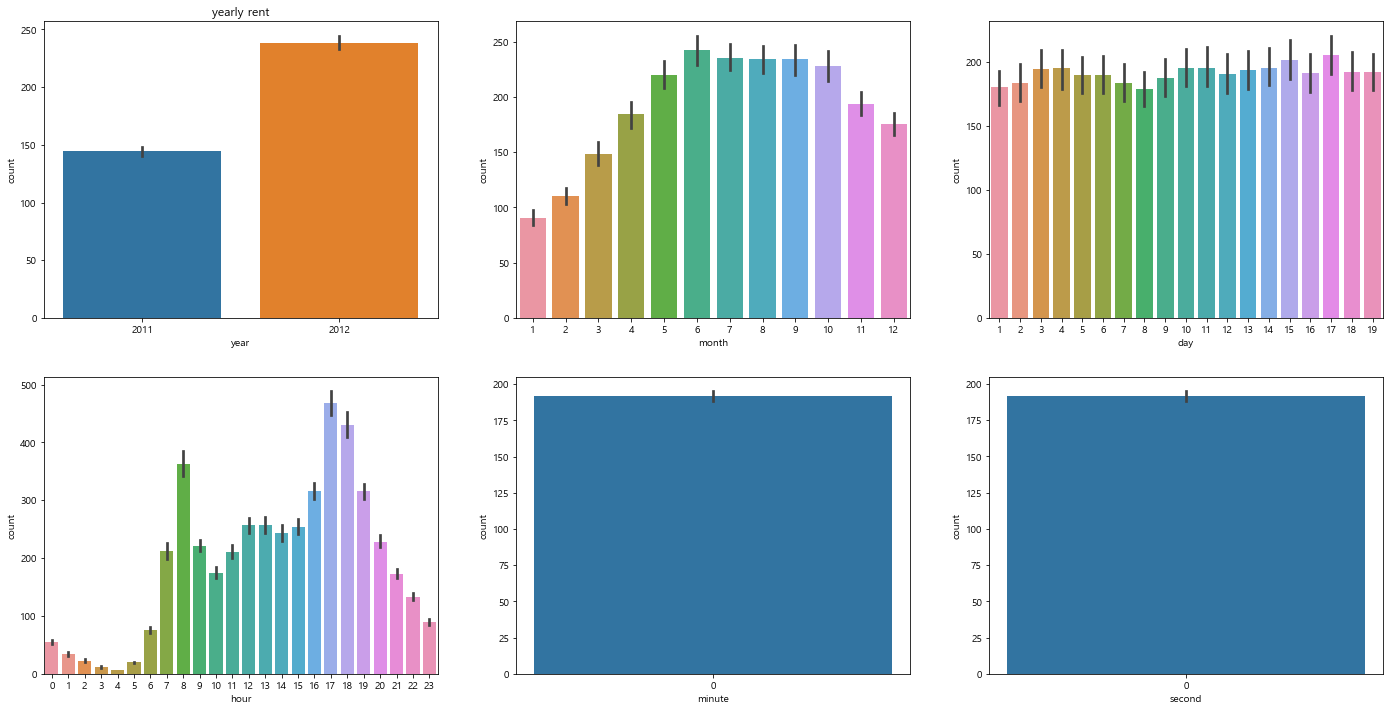

In [34]:
figure, ((ax1,ax2,ax3),(ax4, ax5, ax6))=plt.subplots(nrows=2, ncols=3)
#6개의 axes로 구성된 figure 생성
figure.set_size_inches(24,12)
sns.barplot(data = train, x ='year', y='count', ax = ax1)
sns.barplot(data = train, x ='month', y='count', ax = ax2)
sns.barplot(data = train, x ='day', y='count', ax = ax3)
sns.barplot(data = train, x ='hour', y='count', ax = ax4)
sns.barplot(data = train, x ='minute', y='count', ax = ax5)
sns.barplot(data = train, x ='second', y='count', ax = ax6)

ax1.set(ylabel = 'count', title = 'yearly rent')

# 이상치 -> boxplot

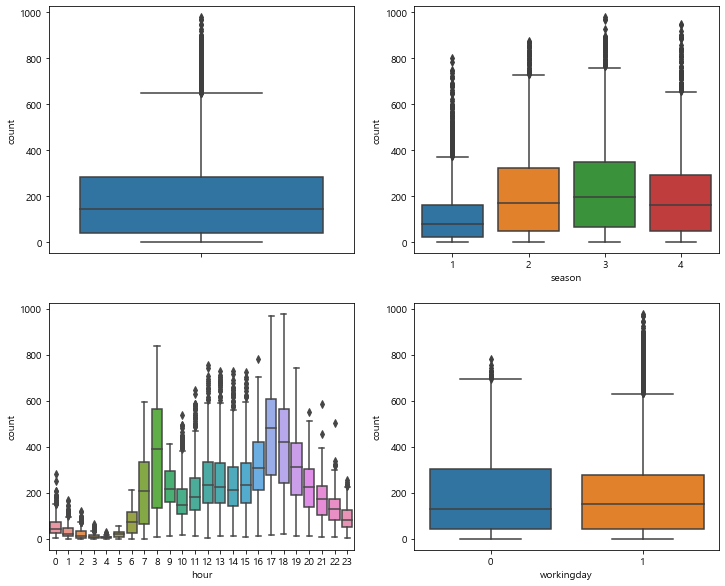

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data = train, y = 'count', orient = 'v', ax = axes[0][0] )
sns.boxplot(data = train, y = 'count', x = 'season', orient = 'v', ax = axes[0][1] )
sns.boxplot(data = train, y = 'count', x = 'hour', orient = 'v', ax = axes[1][0] )
sns.boxplot(data = train, y = 'count', x = 'workingday', orient = 'v', ax = axes[1][1] )

In [48]:
train['dayofweek'] = train.datetime.dt.dayofweek

In [50]:
train['dayofweek'].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

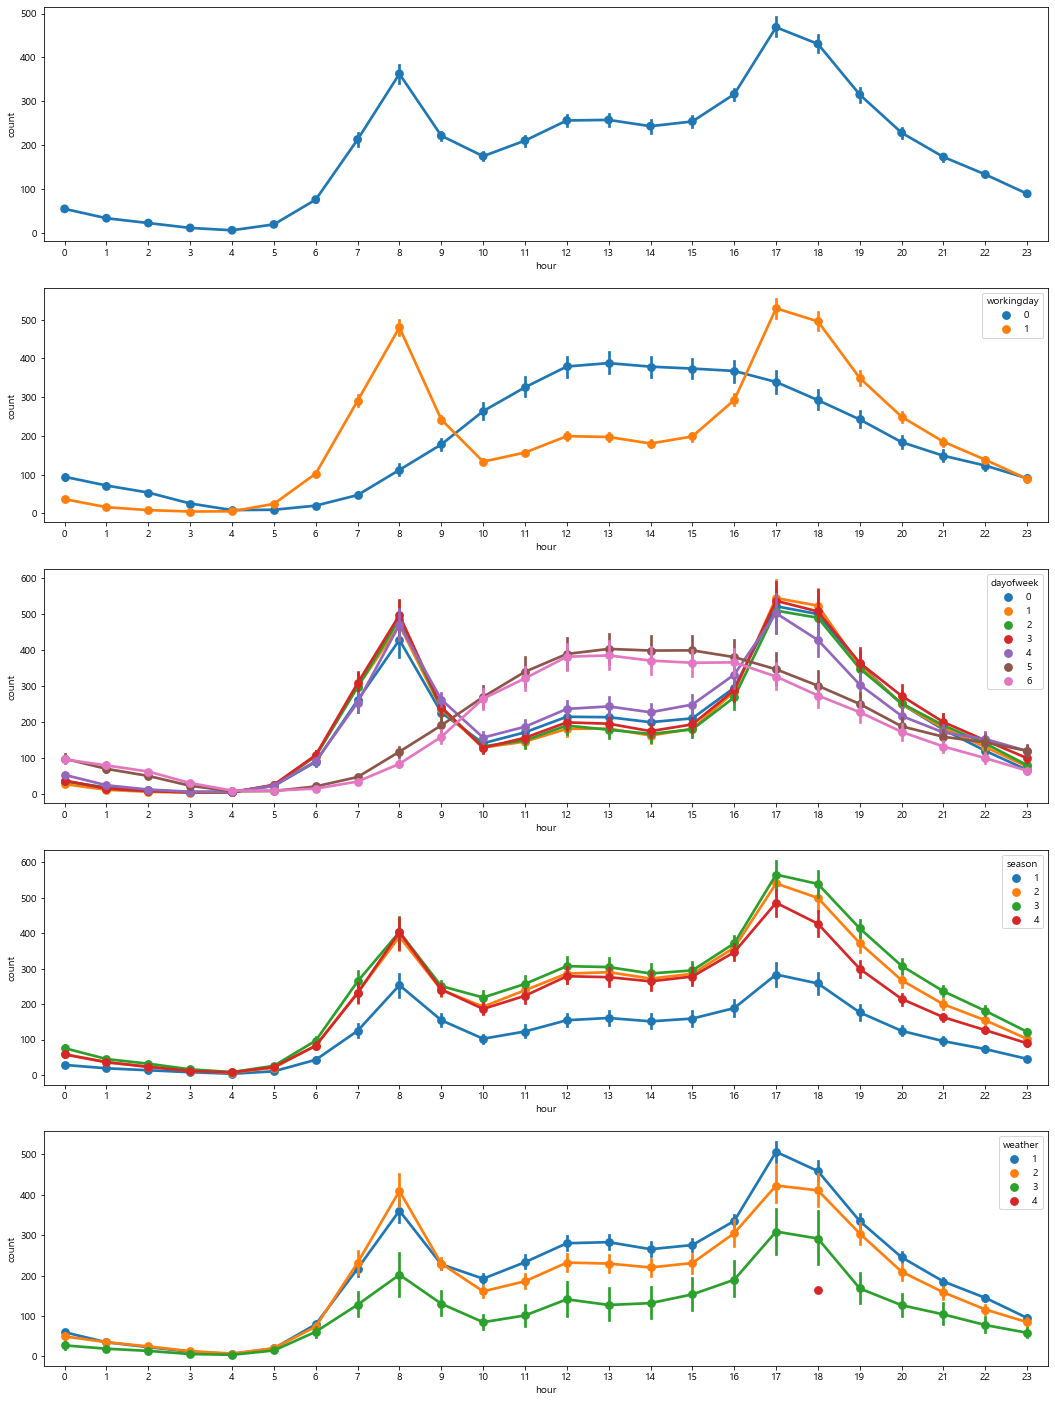

In [62]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=5)
fig.set_size_inches(18, 25)
sns.pointplot(data = train, x = 'hour', y='count', ax =ax1)
sns.pointplot(data = train, x = 'hour', y='count', hue='workingday', ax =ax2)
sns.pointplot(data = train, x = 'hour', y='count', hue='dayofweek', ax =ax3)
sns.pointplot(data = train, x = 'hour', y='count', hue='season', ax =ax4)
sns.pointplot(data = train, x = 'hour', y='count', hue='weather', ax =ax5)

In [64]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek'],
      dtype='object')

In [69]:
corrMatt = train[['temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']]
corr = corrMatt.corr()
corr

temp     atemp  humidity  windspeed    casual  registered  \
temp        1.000000  0.984948 -0.064949  -0.017852  0.467097    0.318571   
atemp       0.984948  1.000000 -0.043536  -0.057473  0.462067    0.314635   
humidity   -0.064949 -0.043536  1.000000  -0.318607 -0.348187   -0.265458   
windspeed  -0.017852 -0.057473 -0.318607   1.000000  0.092276    0.091052   
casual      0.467097  0.462067 -0.348187   0.092276  1.000000    0.497250   
registered  0.318571  0.314635 -0.265458   0.091052  0.497250    1.000000   
count       0.394454  0.389784 -0.317371   0.101369  0.690414    0.970948   

               count  
temp        0.394454  
atemp       0.389784  
humidity   -0.317371  
windspeed   0.101369  
casual      0.690414  
registered  0.970948  
count       1.000000

In [75]:
# 코드가 변함이 없어서 그대로 써주면 됨

mask = np.array(corr) #배열로 바꿔주기
mask[np.tril_indices_from(mask)] = False

# 상관계수 히트맵 그리기

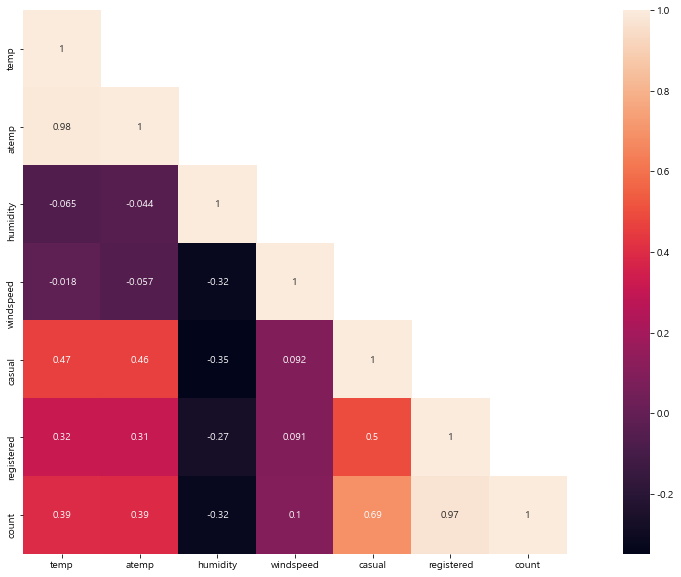

In [76]:
fig, ax= plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(corr, mask = mask, square = True, annot = True)

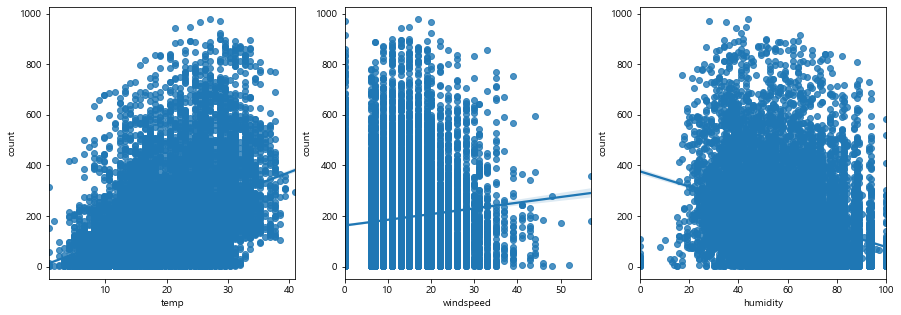

In [79]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_size_inches(15,5)

sns.regplot(x = 'temp', y = 'count', data=train, ax = ax1)
sns.regplot(x = 'windspeed', y = 'count', data=train, ax = ax2)
sns.regplot(x = 'humidity', y = 'count', data=train, ax = ax3)

In [80]:
def myConcat(dtime):
    # data = pd.concat(dtime['year'] + dtime['month'])
    return "{0}-{1}".format(dtime.year, dtime.month)
# myconcat함수를 호출하여 datetime를 출력
# 2011-1 과 같이 연도 - 월을 문자열로 구성하여 리턴
train['year_month'] = train['datetime'].apply(myConcat)


In [83]:
train[['datetime', 'year_month']]

datetime year_month
0     2011-01-01 00:00:00     2011-1
1     2011-01-01 01:00:00     2011-1
2     2011-01-01 02:00:00     2011-1
3     2011-01-01 03:00:00     2011-1
4     2011-01-01 04:00:00     2011-1
...                   ...        ...
10881 2012-12-19 19:00:00    2012-12
10882 2012-12-19 20:00:00    2012-12
10883 2012-12-19 21:00:00    2012-12
10884 2012-12-19 22:00:00    2012-12
10885 2012-12-19 23:00:00    2012-12

[10886 rows x 2 columns]

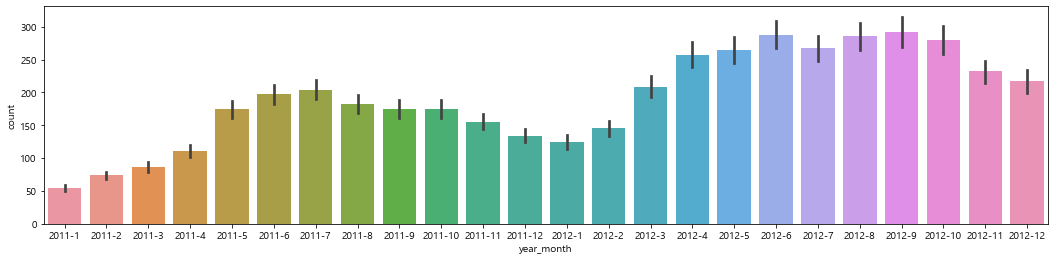

In [85]:
fig, axes = plt.subplots()
fig.set_size_inches(18,4)

sns.barplot(x = 'year_month', y = 'count', data=train, ax = axes)
# sns.regplot(x = 'windspeed', y = 'count', data=train, ax = ax2)
# sns.regplot(x = 'humidity', y = 'count', data=train, ax = ax3)

# 모델링 

In [87]:
train.shape

(10886, 20)

In [90]:

train = pd.read_csv('Kaggle/bike-sharing-demand/train.csv', parse_dates=['datetime'])
test = pd.read_csv('Kaggle/bike-sharing-demand/test.csv', parse_dates=['datetime'])

In [94]:
train.shape #(10886, 12)
test.shape #(6493, 9)

(6493, 9)

In [97]:
train['year'] = train.datetime.dt.year
train['month'] = train.datetime.dt.month
train['day'] = train.datetime.dt.day
train['hour'] = train.datetime.dt.hour
train['minute'] = train.datetime.dt.minute
train['second'] = train.datetime.dt.second
train['dayofweek'] = train.datetime.dt.dayofweek

In [98]:
train[['year', 'month', 'hour', 'dayofweek']]

year  month  hour  dayofweek
0      2011      1     0          5
1      2011      1     1          5
2      2011      1     2          5
3      2011      1     3          5
4      2011      1     4          5
...     ...    ...   ...        ...
10881  2012     12    19          2
10882  2012     12    20          2
10883  2012     12    21          2
10884  2012     12    22          2
10885  2012     12    23          2

[10886 rows x 4 columns]

In [99]:
test['year'] = test.datetime.dt.year
test['month'] = test.datetime.dt.month
test['day'] = test.datetime.dt.day
test['hour'] = test.datetime.dt.hour
test['minute'] = test.datetime.dt.minute
test['second'] = test.datetime.dt.second
test['dayofweek'] = test.datetime.dt.dayofweek

#  랜덤 포레스트

In [100]:
from sklearn.ensemble import RandomForestRegressor

rfmodel = RandomForestRegressor()  
rfmodel.fit(xdata, ydata)      
예측결과 = rfmodel.predict(xtest)      
windspeed 고민해보기    

In [111]:
xdata = train.drop(['casual', 'registered', 'count', 'day', 'minute', 'second'], axis = 1)
ydata = train.count

KeyError: "['casual' 'registered' 'count' 'day' 'minute' 'second'] not found in axis"

In [105]:
xtest = test.drop(['day', 'minute', 'second'], axis = 1, inplace = True)

In [104]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour',
       'minute', 'second', 'dayofweek'],
      dtype='object')

In [110]:
test

datetime  season  holiday  workingday  weather   temp   atemp  \
0    2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1    2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2    2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3    2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4    2011-01-20 04:00:00       1        0           1        1  10.66  12.880   
...                  ...     ...      ...         ...      ...    ...     ...   
6488 2012-12-31 19:00:00       1        0           1        2  10.66  12.880   
6489 2012-12-31 20:00:00       1        0           1        2  10.66  12.880   
6490 2012-12-31 21:00:00       1        0           1        1  10.66  12.880   
6491 2012-12-31 22:00:00       1        0           1        1  10.66  13.635   
6492 2012-12-31 23:00:00       1        0           1        1  10.66  13.635   

      humidity  windspeed  year  month  hour  dayofweek  
0           56    26.0027  2011      1     0          3  
1           56     0.0000  2011      1     1          3  
2           56     0.0000  2011      1     2          3  
3           56    11.0014  2011      1     3          3  
4           56    11.0014  2011      1     4          3  
...        ...        ...   ...    ...   ...        ...  
6488        60    11.0014  2012     12    19          0  
6489        60    11.0014  2012     12    20          0  
6490        60    11.0014  2012     12    21          0  
6491        56     8.9981  2012     12    22          0  
6492        65     8.9981  2012     12    23          0  

[6493 rows x 13 columns]

In [107]:
rfmodel = RandomForestRegressor()
rfmodel.fit(xdata, ydata)

ValueError: Expected 2D array, got scalar array instead:
array=nan.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.